In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

## Load and Explore the Data

In [4]:
data = pd.read_csv("C://Users//ACER//Downloads/heart_disease.csv.")

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.shape

(1025, 14)

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

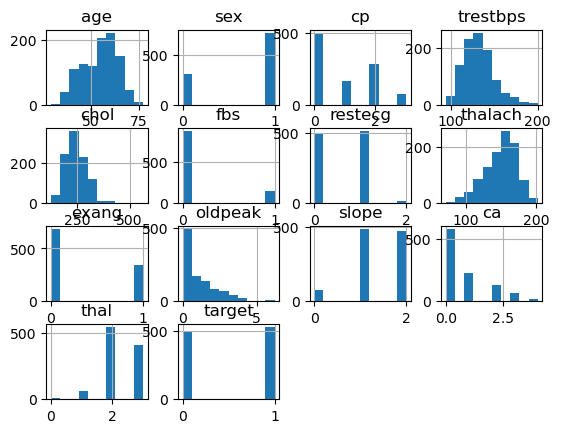

In [12]:
data.hist()

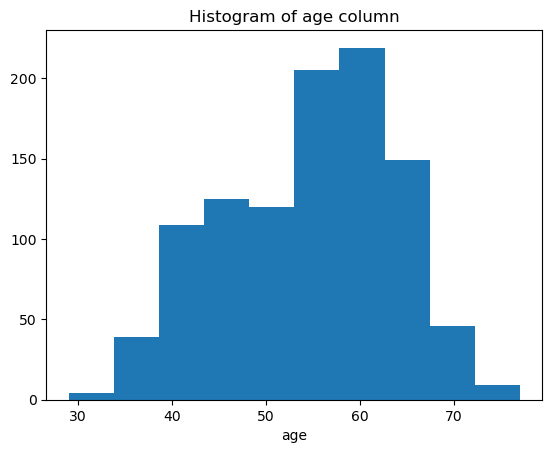

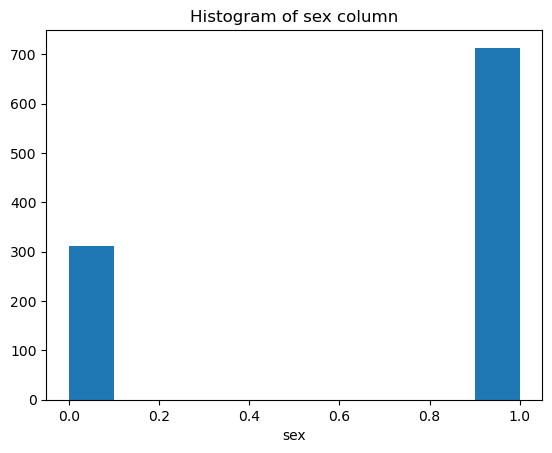

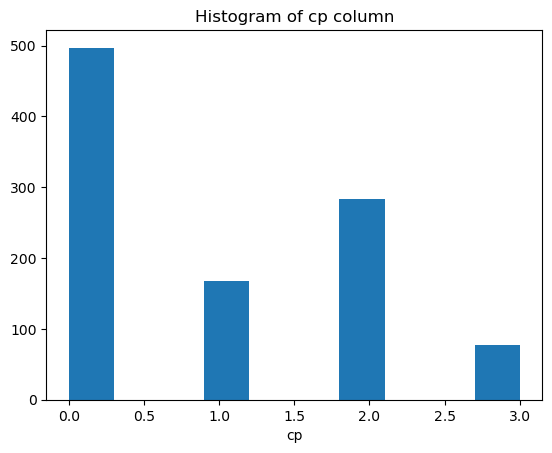

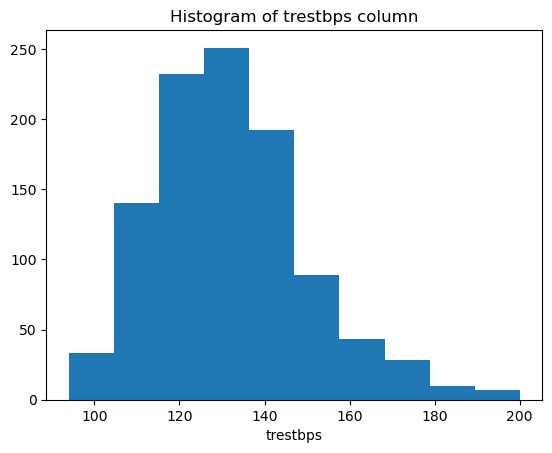

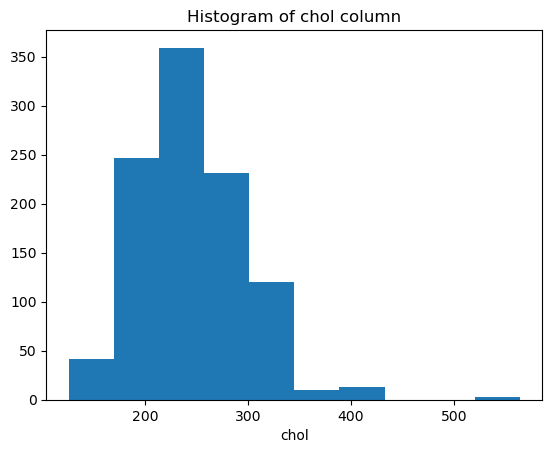

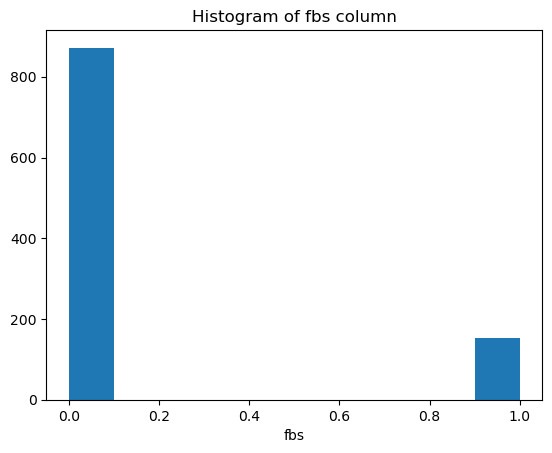

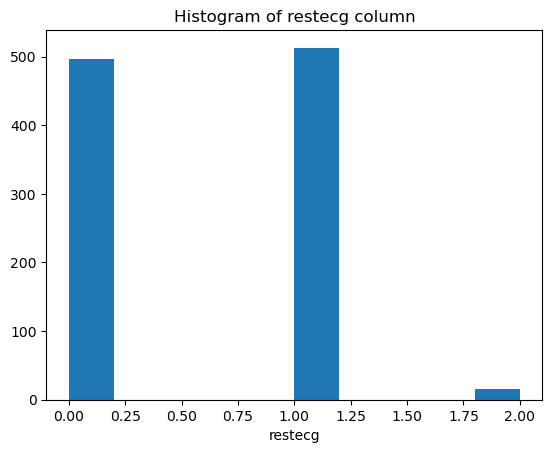

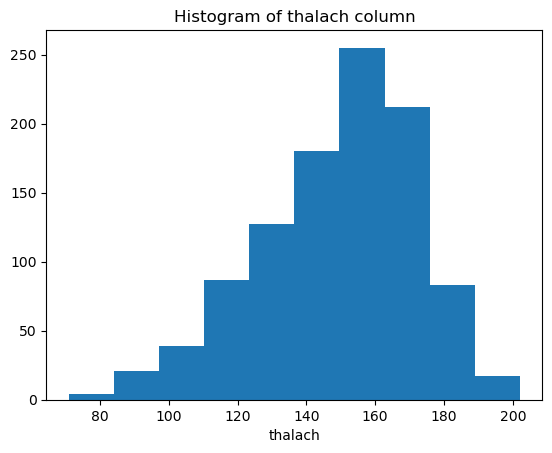

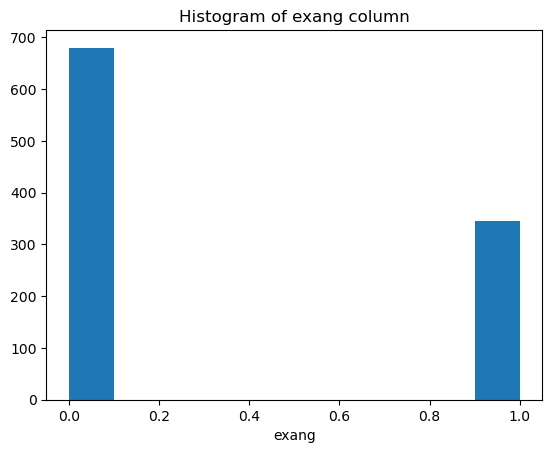

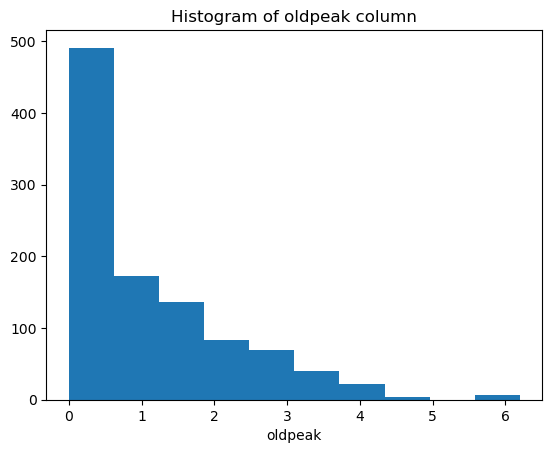

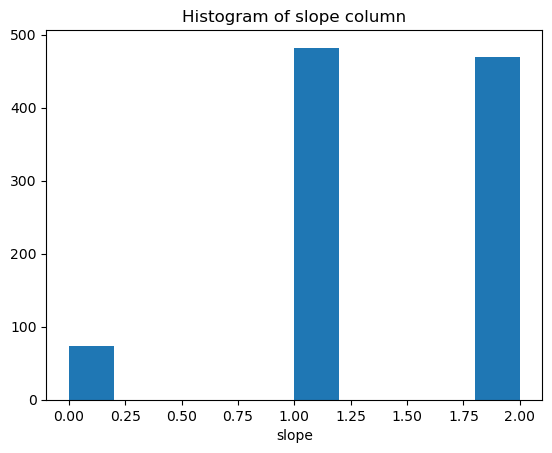

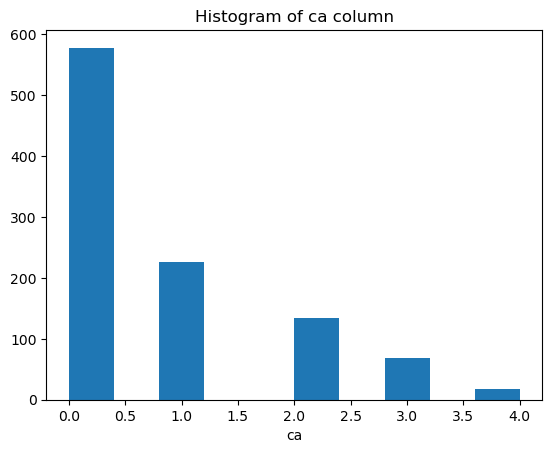

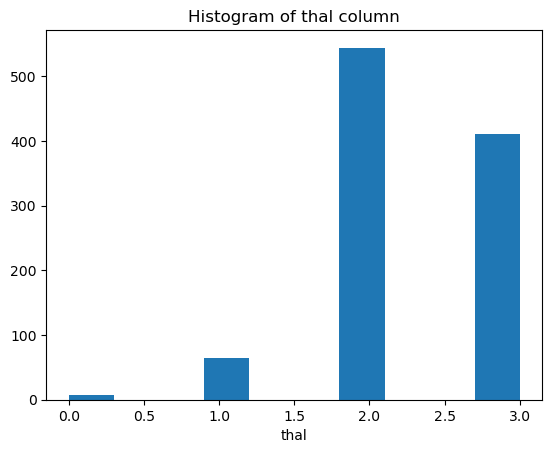

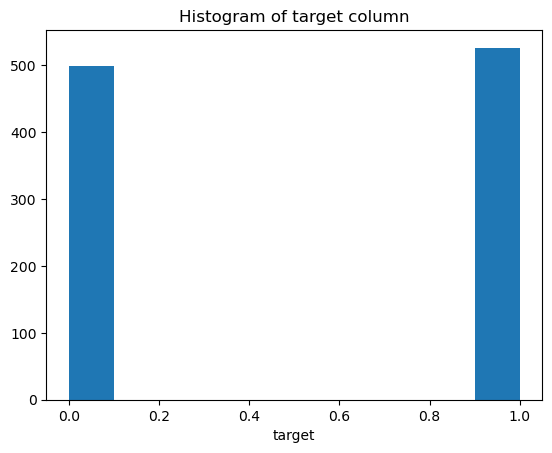

In [13]:
for col in data: 
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.show()

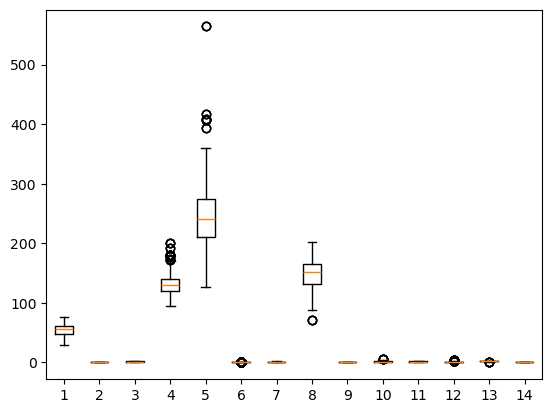

In [14]:
plt.boxplot(data) 
plt.show()

## Data Cleaning and Preprocessing

In [16]:
data = pd.get_dummies(data,columns=['cp','restecg','thal'],dtype=int)

In [17]:
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,...,1,0,0,0,1,0,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,1,...,0,0,0,1,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,2,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
std_scalar = StandardScaler()
data['trestbps_Std_Scalar'] = std_scalar.fit_transform(data[['trestbps']])
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,trestbps_Std_Scalar
0,52,1,125,212,0,168,0,1.0,2,2,...,0,0,0,1,0,0,0,0,1,-0.377636
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,1,0,0,0,0,0,1,0.479107
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,1,0,0,0,0,1,0.764688
3,61,1,148,203,0,161,0,0.0,2,1,...,0,0,0,1,0,0,0,0,1,0.936037
4,62,0,138,294,1,106,0,1.9,1,3,...,0,0,0,1,0,0,0,1,0,0.364875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,...,0,0,0,1,0,0,0,1,0,0.479107
1021,60,1,125,258,0,141,1,2.8,1,1,...,0,0,1,0,0,0,0,0,1,-0.377636
1022,47,1,110,275,0,118,1,1.0,1,1,...,0,0,1,0,0,0,0,1,0,-1.234378
1023,50,0,110,254,0,159,0,0.0,2,0,...,0,0,1,0,0,0,0,1,0,-1.234378


In [20]:
std_scalar = StandardScaler()
data['Oldpeak_Std_Scalar'] = std_scalar.fit_transform(data[['oldpeak']])
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,trestbps_Std_Scalar,Oldpeak_Std_Scalar
0,52,1,125,212,0,168,0,1.0,2,2,...,0,0,1,0,0,0,0,1,-0.377636,-0.060888
1,53,1,140,203,1,155,1,3.1,0,0,...,0,1,0,0,0,0,0,1,0.479107,1.727137
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,1,0,0,0,0,1,0.764688,1.301417
3,61,1,148,203,0,161,0,0.0,2,1,...,0,0,1,0,0,0,0,1,0.936037,-0.912329
4,62,0,138,294,1,106,0,1.9,1,3,...,0,0,1,0,0,0,1,0,0.364875,0.705408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,...,0,0,1,0,0,0,1,0,0.479107,-0.912329
1021,60,1,125,258,0,141,1,2.8,1,1,...,0,1,0,0,0,0,0,1,-0.377636,1.471705
1022,47,1,110,275,0,118,1,1.0,1,1,...,0,1,0,0,0,0,1,0,-1.234378,-0.060888
1023,50,0,110,254,0,159,0,0.0,2,0,...,0,1,0,0,0,0,1,0,-1.234378,-0.912329


## Train-Test Split


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y = data["target"]
x = data.drop("target", axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Build Machine Learning Models

### Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.697560975609756


In [30]:
from sklearn.naive_bayes import GaussianNB
bc = GaussianNB()
bc.fit(x_train,y_train)

GaussianNB()

In [31]:
pred = bc.predict(x_test)

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [33]:
print('Accuracy:',accuracy_score(pred,y_test))
print('Precision:',precision_score(pred,y_test,average='weighted'))
print('Recall:',recall_score(pred,y_test,average='weighted'))
print('F1 Score:',f1_score(pred,y_test,average='weighted'))

Accuracy: 0.8390243902439024
Precision: 0.8425365853658537
Recall: 0.8390243902439024
F1 Score: 0.8391623397773648


### Regression

In [35]:
data1 = data.copy()

In [36]:
y = data1['chol']
x = data1.drop('chol', axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.36097560975609755


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mae

40.15582718180518

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

3168.998593640416

In [45]:
r2 = r2_score(y_test, y_pred)
r2

0.07398578601388917

In [46]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 40.15582718180518
Mean Squared Error (MSE): 3168.998593640416
R-squared (R²): 0.07398578601388917
